In [37]:
from qiskit import *
from qiskit_textbook.tools import array_to_latex,random_state
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram

In [13]:
def create_bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

In [22]:
def alice_gate(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)

In [23]:
def bob_gate(qc,a,b,c):
    qc.cz(a,c)
    qc.cx(b,c)    

In [30]:
psi = random_state(1)
init_gate = Initialize(psi)
init_gate.label = 'init'
inverse_init_gate = init_gate.gates_to_uncompute()
array_to_latex(psi, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

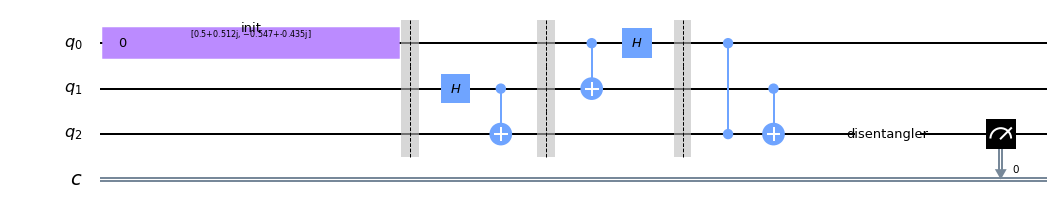

In [31]:
qc = QuantumCircuit(3,1)

qc.append(init_gate, [0])
qc.barrier()

create_bell_pair(qc,1,2)
qc.barrier()

alice_gate(qc,0,1)
qc.barrier()

bob_gate(qc,0,1,2)

qc.append(inverse_init_gate, [2])

qc.measure(2,0)
qc.draw('mpl')

In [32]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [33]:
# get the least-busy backend at IBM and run the quantum circuit there
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
job_exp = execute(qc, backend=backend, shots=8192)

In [36]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_exp)

Job Status: job has successfully run


{'0': 7431, '1': 761}


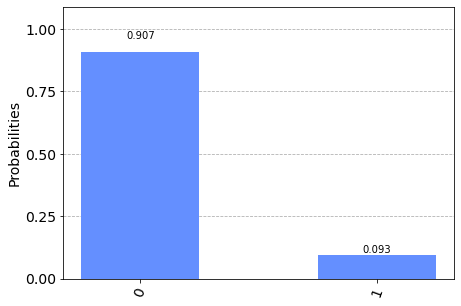

In [38]:
exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)

In [39]:
error_rate_percent = sum([exp_measurement_result[result] for result in exp_measurement_result.keys() if result[0]=='1']) \
                    * 100./ sum(list(exp_measurement_result.values()))
print("The experimental error rate : ", error_rate_percent, "%")

The experimental error rate :  9.28955078125 %
